<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1> Dominick’s Grocery Store Project </h1>
    <b> Nabeel Keloth</b>

<br>Prof.Michael Rolleigh | Data Optimization <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2> Import Libraries and Read Dataset </h2><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # linear regression (statsmodels)
import math
oj_df = pd.read_excel("OJ_Data.xlsx")
#oj_df.head(n=10)
oj_df.describe().round(5)

,week,sales1,sales2,sales3,sales4,sales5,price1,price2,price3,price4,...,feat1,feat2,feat3,feat4,feat5,grmar1,grmar2,grmar3,grmar4,grmar5
count,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,...,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000,116.00000
mean,101.84483,18879.44828,11763.31034,14898.20690,18481.10345,15358.89655,0.04532,0.05003,0.03597,0.03544,...,0.16506,0.12911,0.33229,0.27300,0.25000,0.27933,0.28558,0.29456,0.25338,0.29291
std,34.54338,20103.60996,4416.20744,24515.78392,27366.16593,18560.14773,0.00868,0.00574,0.00630,0.00610,...,0.36710,0.33649,0.46600,0.44295,0.43489,0.12266,0.06269,0.11391,0.11011,0.14171
min,40.00000,4608.00000,6048.00000,704.00000,3072.00000,896.00000,0.02641,0.03708,0.02328,0.02016,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.01566,0.04803,0.00079,0.00577,0.00770
25%,73.75000,7600.00000,8736.00000,2096.00000,5184.00000,3504.00000,0.03891,0.04781,0.03109,0.03109,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.22155,0.27481,0.22135,0.17319,0.20690
50%,102.50000,10880.00000,10704.00000,3648.00000,7872.00000,7264.00000,0.04672,0.04948,0.03672,0.03531,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.29041,0.29620,0.33048,0.26198,0.29220
75%,131.25000,17040.00000,12984.00000,13088.00000,19088.00000,18208.00000,0.05297,0.05292,0.04032,0.03907,...,0.00000,0.00000,1.00000,1.00000,0.25000,0.36721,0.31542,0.37774,0.33489,0.40880
max,160.00000,98624.00000,29952.00000,171264.00000,192128.00000,83008.00000,0.05719,0.06031,0.04516,0.04672,...,1.00000,1.00000,1.00000,1.00000,1.00000,0.48616,0.41816,0.49137,0.44993,0.53650


totalprofit1 = oj_df['price1']/64 *oj_df['sales1']*oj_df['grmar1']
totalprofit2 = oj_df['price2']/96 *oj_df['sales2']*oj_df['grmar2']
totalprofit3 = oj_df['price3']/64 *oj_df['sales3']*oj_df['grmar3']
totalprofit4 = oj_df['price4']/64 *oj_df['sales4']*oj_df['grmar4']
totalprofit5 = oj_df['price5']/64 *oj_df['sales5']*oj_df['grmar5']

totalprofits = totalprofit1 + totalprofit2 +totalprofit3+totalprofit4+totalprofit5
#totalprofit1.sum()

Text(0.5, 0, 'prices')

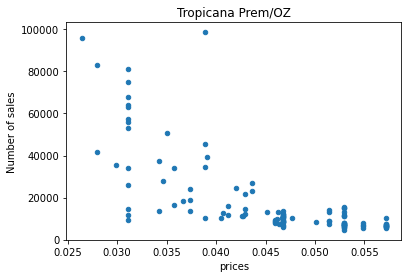

In [2]:
#scatter plot to see the trend in price 
oj_df.plot.scatter(x= 'price1', y='sales1')
plt.title('Tropicana Prem/OZ')
plt.ylabel('Number of sales')
plt.xlabel('prices')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


# Cleanning Data



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [3]:
#cleaning step
# 0 & 1 (disp and feat)
oj_df.loc[(oj_df.disp1 >= 0.5),'disp1'] = 1
oj_df.loc[(oj_df.disp1 < 0.5),'disp1'] = 0
oj_df.loc[(oj_df.disp2 >= 0.5),'disp2'] = 1
oj_df.loc[(oj_df.disp2 < 0.5),'disp2'] = 0
oj_df.loc[(oj_df.disp3 >= 0.5),'disp3'] = 1
oj_df.loc[(oj_df.disp3 < 0.5),'disp3'] = 0
oj_df.loc[(oj_df.disp4 >= 0.5),'disp4'] = 1
oj_df.loc[(oj_df.disp4 < 0.5),'disp4'] = 0
oj_df.loc[(oj_df.disp5 >= 0.5),'disp5'] = 1
oj_df.loc[(oj_df.disp5 < 0.5),'disp5'] = 0

oj_df.loc[(oj_df.feat1 >= 0.5),'feat1'] = 1
oj_df.loc[(oj_df.feat1 < 0.5),'feat1'] = 0
oj_df.loc[(oj_df.feat2 >= 0.5),'feat2'] = 1
oj_df.loc[(oj_df.feat2 < 0.5),'feat2'] = 0
oj_df.loc[(oj_df.feat3 >= 0.5),'feat3'] = 1
oj_df.loc[(oj_df.feat3 < 0.5),'feat3'] = 0
oj_df.loc[(oj_df.feat4 >= 0.5),'feat4'] = 1
oj_df.loc[(oj_df.feat4 < 0.5),'feat4'] = 0
oj_df.loc[(oj_df.feat5 >= 0.5),'feat5'] = 1
oj_df.loc[(oj_df.feat5 < 0.5),'feat5'] = 0


#oj_df.disp1.value_counts()
#oj_df.head(n=5)

In [4]:
#taking Natural log for sales and prices

oj_df['sales1_log'] = np.log(oj_df['sales1'])
oj_df['sales2_log'] = np.log(oj_df['sales2'])
oj_df['sales3_log'] = np.log(oj_df['sales3'])
oj_df['sales4_log'] = np.log(oj_df['sales4'])
oj_df['sales5_log'] = np.log(oj_df['sales5'])

oj_df['price1_log'] = np.log(oj_df['price1'])
oj_df['price2_log'] = np.log(oj_df['price2'])
oj_df['price3_log'] = np.log(oj_df['price3'])
oj_df['price4_log'] = np.log(oj_df['price4'])
oj_df['price5_log'] = np.log(oj_df['price5'])

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Regression models

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />



## Product 1

In [5]:
#predict gmar item1

lm_gmar1 = smf.ols(formula = """ grmar1 ~ price1 """,
                  data = oj_df)
results_gmar1 = lm_gmar1.fit()
print(results_gmar1.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar1   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           2.06e-21
Time:                        20:48:40   Log-Likelihood:                 125.43
No. Observations:                 116   AIC:                            -246.9
Df Residuals:                     114   BIC:                            -241.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1949      0.041     -4.751      0.0

In [6]:
#product number 1
# Step 1: build a model
lm_1 = smf.ols(formula =  """ sales1_log ~ disp1 + 
                                             feat1 + 
                                             price1_log+
                                             price2_log+
                                             price3_log+
                                             price4_log+
                                             price5_log""",
                               data = oj_df )


# Step 2: fit the model based on the data
results1 = lm_1.fit()


# Step 3: analyze the summary output
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:             sales1_log   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     59.46
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           3.56e-34
Time:                        20:48:41   Log-Likelihood:                -39.592
No. Observations:                 116   AIC:                             95.18
Df Residuals:                     108   BIC:                             117.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3030      1.109      2.977      0.0

In [7]:
#setting up the obj for item1-5
avg_ln_price1 = np.log(np.mean(oj_df['price1']))
avg_ln_price2 = np.log(np.mean(oj_df['price2']))
avg_ln_price3 = np.log(np.mean(oj_df['price3']))
avg_ln_price4 = np.log(np.mean(oj_df['price4']))
avg_ln_price5 = np.log(np.mean(oj_df['price5']))

disp1 = 0
disp2 = 0
disp3 = 0
disp4 = 0
disp5 = 0

feat1 = 0
feat2 = 0
feat3 = 0
feat4 = 0
feat5 = 0

unit1=64
unit2=96
unit3=64
unit4=64
unit5=64

In [8]:
#setting up obj value for item1

pro1_inter_sale1 = round(results1.params.Intercept,6)
pro1_price1_coef = round(results1.params.price1_log ,6)
pro1_price2_coef = round(results1.params.price2_log ,6)
pro1_price3_coef = round(results1.params.price3_log ,6)
pro1_price4_coef = round(results1.params.price4_log ,6)
pro1_price5_coef = round(results1.params.price5_log ,6)
pro1_disp1_coef = round(results1.params.disp1 ,6)
pro1_feat1_coef = round(results1.params.feat1 ,6) 
pro1_price1_mean = round(results1.params.price1_log ,6)
pro1_price1_std = round(results1.bse.price1_log ,6)
pro1_gmar1_inter = round(results_gmar1.params.Intercept,6)
pro1_gmar1_coef = round(results_gmar1.params.price1,6)


## Product 2

In [9]:
#predict gmar item2

lm_gmar2 = smf.ols(formula = """ grmar2 ~ price2 """,
                  data = oj_df)
results_gmar2 = lm_gmar2.fit()
print(results_gmar2.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar2   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     93.12
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.82e-16
Time:                        20:48:46   Log-Likelihood:                 191.81
No. Observations:                 116   AIC:                            -379.6
Df Residuals:                     114   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0806      0.038     -2.110      0.0

In [10]:
#product number 2
# Step 1: build a model
lm_2 = smf.ols(formula =  """ sales2_log ~   disp2 + 
                                             feat2 + 
                                             price1_log+
                                             price2_log+
                                             price3_log+
                                             price4_log+
                                             price5_log """,
                               data = oj_df )


# Step 2: fit the model based on the data
results2 = lm_2.fit()


# Step 3: analyze the summary output
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             sales2_log   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     19.51
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.15e-16
Time:                        20:48:48   Log-Likelihood:                 11.315
No. Observations:                 116   AIC:                            -6.631
Df Residuals:                     108   BIC:                             15.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2759      0.730      7.225      0.0

In [11]:
pro2_inter_sale2 = round(results2.params.Intercept,6)
pro2_price1_coef = round(results2.params.price1_log ,6)
pro2_price2_mean = round(results2.params.price2_log ,6)
pro2_price2_std = round(results2.bse.price2_log ,6)
pro2_price3_coef = round(results2.params.price3_log ,6)
pro2_price4_coef = round(results2.params.price4_log ,6)
pro2_price5_coef = round(results2.params.price5_log ,6)
pro2_disp2_coef = round(results2.params.disp2 ,6)
pro2_feat2_coef = round(results2.params.feat2 ,6) 
pro2_gmar2_inter = round(results_gmar2.params.Intercept,6)
pro2_gmar2_coef = round(results_gmar2.params.price2,6)
pro2_price2_coef = round(results2.params.price2_log ,6)


## Product 3

In [12]:
#predict gmar item3

lm_gmar3 = smf.ols(formula = """ grmar3 ~ price3 """,
                  data = oj_df)
results_gmar3 = lm_gmar3.fit()
print(results_gmar3.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar3   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           8.93e-20
Time:                        20:48:55   Log-Likelihood:                 130.22
No. Observations:                 116   AIC:                            -256.4
Df Residuals:                     114   BIC:                            -250.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1733      0.043     -4.038      0.0

In [13]:
#product number 3
# Step 1: build a model
lm_3 = smf.ols(formula =  """ sales3_log ~  disp3 + 
                                             feat3 + 
                                             price1_log+
                                             price2_log+
                                             price3_log+
                                             price4_log+
                                             price5_log """,
                               data = oj_df )


# Step 2: fit the model based on the data
results3 = lm_3.fit()


# Step 3: analyze the summary output
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:             sales3_log   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     38.20
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.85e-26
Time:                        20:49:00   Log-Likelihood:                -126.90
No. Observations:                 116   AIC:                             269.8
Df Residuals:                     108   BIC:                             291.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3681      2.481      2.164      0.0

In [14]:
#setting up obj value for item3


pro3_inter_sale3 = round(results3.params.Intercept,6)
pro3_price1_coef = round(results3.params.price1_log ,6)
pro3_price2_coef = round(results3.params.price2_log ,6)
pro3_price3_mean = round(results3.params.price3_log ,6)
pro3_price3_std = round(results3.bse.price3_log ,6)
pro3_price4_coef = round(results3.params.price4_log ,6)
pro3_price5_coef = round(results3.params.price5_log ,6)
pro3_disp3_coef = round(results3.params.disp3 ,6)
pro3_feat3_coef = round(results3.params.feat3 ,6) 
pro3_gmar3_inter = round(results_gmar3.params.Intercept,6)
pro3_gmar3_coef = round(results_gmar3.params.price3,6)
pro3_price3_coef = round(results3.params.price3_log ,6)

## Product  4

In [15]:
#predict gmar item4

lm_gmar4 = smf.ols(formula = """ grmar4 ~ price4 """,
                  data = oj_df)
results_gmar4 = lm_gmar4.fit()
print(results_gmar4.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar4   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     105.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           7.32e-18
Time:                        20:49:05   Log-Likelihood:                 129.71
No. Observations:                 116   AIC:                            -255.4
Df Residuals:                     114   BIC:                            -249.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1895      0.044     -4.322      0.0

In [16]:
#product number 4
# Step 1: build a model
lm_4 = smf.ols(formula =  """ sales4_log ~ disp4 + 
                                                feat4 + 
                                                price1_log+
                                                price2_log+
                                                price3_log+
                                                price4_log+
                                                price5_log """,
                               data = oj_df )

# Step 2: fit the model based on the data
results4 = lm_4.fit()


# Step 3: analyze the summary output
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:             sales4_log   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     46.70
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           7.43e-30
Time:                        20:49:06   Log-Likelihood:                -74.636
No. Observations:                 116   AIC:                             165.3
Df Residuals:                     108   BIC:                             187.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3356      1.633      3.879      0.0

In [17]:
#setting up obj value for item4


pro4_inter_sale4 = round(results4.params.Intercept,6)
pro4_price1_coef = round(results4.params.price1_log ,6)
pro4_price2_coef = round(results4.params.price2_log ,6)
pro4_price3_coef = round(results4.params.price3_log ,6)
pro4_price4_mean = round(results4.params.price4_log ,6)
pro4_price4_std = round(results4.bse.price4_log ,6)
pro4_price5_coef = round(results4.params.price5_log ,6)
pro4_disp4_coef = round(results4.params.disp4 ,6)
pro4_feat4_coef = round(results4.params.feat4 ,6) 
pro4_gmar4_inter = round(results_gmar4.params.Intercept,6)
pro4_gmar4_coef = round(results_gmar4.params.price4,6)
pro4_price4_coef = round(results4.params.price4_log ,6)

## Product  5

In [18]:
#predict gmar item5

lm_gmar5 = smf.ols(formula = """ grmar5 ~ price5 """,
                  data = oj_df)
results_gmar5 = lm_gmar5.fit()
print(results_gmar5.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar5   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     132.4
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           8.42e-21
Time:                        20:49:09   Log-Likelihood:                 107.27
No. Observations:                 116   AIC:                            -210.5
Df Residuals:                     114   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2007      0.044     -4.579      0.0

In [19]:
#product number 5
# Step 1: build a model
lm_5 = smf.ols(formula =  """ sales5_log ~   disp5 + 
                                                feat5 + 
                                                price1_log+
                                                price2_log+
                                                price3_log+
                                                price4_log+
                                                price5_log """,
                               data = oj_df )


# Step 2: fit the model based on the data
results5 = lm_5.fit()


# Step 3: analyze the summary output
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:             sales5_log   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     30.94
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           4.05e-23
Time:                        20:49:11   Log-Likelihood:                -118.15
No. Observations:                 116   AIC:                             252.3
Df Residuals:                     108   BIC:                             274.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5951      2.166     -0.275      0.7

In [20]:
#setting up obj value for item5


pro5_inter_sale5 = round(results5.params.Intercept,6)
pro5_price1_coef = round(results5.params.price1_log ,6)
pro5_price2_coef = round(results5.params.price2_log ,6)
pro5_price3_coef = round(results5.params.price3_log ,6)
pro5_price4_coef = round(results5.params.price4_log ,6)
pro5_price5_mean = round(results5.params.price5_log ,6)
pro5_price5_std = round(results5.bse.price5_log ,6)
pro5_disp5_coef = round(results5.params.disp5 ,6)
pro5_feat5_coef = round(results5.params.feat5 ,6) 
pro5_price5_coef = round(results5.params.price5_log ,6)

pro5_gmar5_inter = round(results_gmar5.params.Intercept,6)
pro5_gmar5_coef = round(results_gmar5.params.price5,6)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

#  Simulations

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [21]:
#no_marketing 
np.random.seed(42)

#place-holder
#stat_price2 = []

#the number of time to run simulation
num_simulations = 100_000


    
all_stats = []
    
#Inside loop for run simulation
for i in range(num_simulations):
    
    
    # Select 5 random prices within historical range
    future_price1 = np.random.uniform(min(oj_df['price1']),max(oj_df['price1']))
    future_price2 = np.random.uniform(min(oj_df['price2']),max(oj_df['price2']))
    future_price3 = np.random.uniform(min(oj_df['price3']),max(oj_df['price3']))
    future_price4 = np.random.uniform(min(oj_df['price4']),max(oj_df['price4']))
    future_price5 = np.random.uniform(min(oj_df['price5']),max(oj_df['price5']))
    

    
    
        
    # setting random values for coef 2
    # loop_price2 = np.random.normal(pro2_price2_mean, pro2_price2_std)

    #Calculate LN_sales1, LN_sales2, ..
                                          
#the formula from linear regreesion to find the future sale5
    LN_sales1 = pro1_inter_sale1 + (pro1_price5_coef*np.log(future_price5)) \
                      + (pro1_price2_coef*np.log(future_price2)) \
                      + (pro1_price3_coef*np.log(future_price3)) \
                      + (pro1_price4_coef*np.log(future_price4)) \
                      + pro1_price1_coef* np.log(future_price1) \
                      + pro1_disp1_coef*disp1 \
                      + pro1_feat1_coef*feat1


     #the formula from linear regreesion to find the future sale5
    LN_sales2 = pro2_inter_sale2 + (pro2_price1_coef*np.log(future_price1)) \
                      + (pro2_price5_coef*np.log(future_price5)) \
                      + (pro2_price3_coef*np.log(future_price3))\
                      + (pro2_price4_coef*np.log(future_price4)) \
                      + pro2_price2_coef* np.log(future_price2) \
                      + pro2_disp2_coef*disp2 \
                      + pro2_feat2_coef*feat2
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales3 = pro3_inter_sale3 + (pro3_price1_coef*np.log(future_price1)) \
                      + (pro3_price2_coef*np.log(future_price2)) \
                      + (pro3_price5_coef*np.log(future_price5)) \
                      + (pro3_price4_coef*np.log(future_price4)) \
                      + pro3_price3_coef* np.log(future_price3) \
                      + pro3_disp3_coef*disp3 \
                      + pro3_feat3_coef*feat3
                             
                                          
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales4 = pro4_inter_sale4 + (pro4_price1_coef*np.log(future_price1)) \
                      + (pro4_price2_coef*np.log(future_price2)) \
                      + (pro4_price3_coef*np.log(future_price3)) \
                      + (pro4_price5_coef*np.log(future_price4))\
                      + pro4_price4_coef* np.log(future_price4) \
                      + pro4_disp4_coef*disp4 \
                      + pro4_feat4_coef*feat4

                    
    #the formula from linear regreesion to find the future sale5
    LN_sales5 = pro5_inter_sale5 + (pro5_price1_coef*np.log(future_price1)) \
                      + (pro5_price2_coef*np.log(future_price2)) \
                      + (pro5_price3_coef*np.log(future_price3)) \
                      + (pro5_price4_coef*np.log(future_price4)) \
                      + pro5_price5_coef* np.log(future_price5) \
                      + pro5_disp5_coef*disp5 \
                      + pro5_feat5_coef*feat5
                                          
       #calculting gross margin                                    
    future_gmar1 = pro1_gmar1_inter + pro1_gmar1_coef * future_price1
    future_gmar2 = pro2_gmar2_inter + pro2_gmar2_coef * future_price2
    future_gmar3 = pro3_gmar3_inter + pro3_gmar3_coef * future_price3  
    future_gmar4 = pro4_gmar4_inter + pro4_gmar4_coef * future_price4
    future_gmar5 = pro5_gmar5_inter + pro5_gmar5_coef * future_price5
                                          
        #calculting future profit

    futureProfit1 = (future_price1)* future_gmar1 *math.exp(LN_sales1)*unit1
    futureProfit2 = (future_price2)* future_gmar2 *math.exp(LN_sales2)*unit2
    futureProfit3 = (future_price3)* future_gmar3 *math.exp(LN_sales3)*unit3
    futureProfit4 = (future_price4)* future_gmar4 *math.exp(LN_sales4)*unit4
    futureProfit5 = (future_price5)* future_gmar5 *math.exp(LN_sales5)*unit5
                                          
                                          
    #Sum future_profits together
    total_profits = futureProfit1+ futureProfit2+ futureProfit3 +futureProfit4 +futureProfit5

    all_stats.append([future_price1,(future_price1 * unit1),future_gmar1,round(math.exp(LN_sales1),3), futureProfit1, \
                      future_price2,(future_price2 * unit2),future_gmar2,round(math.exp(LN_sales2),3), futureProfit2,\
                      future_price3,(future_price3 * unit3),future_gmar3,round(math.exp(LN_sales3),3),futureProfit3,\
                      future_price4,(future_price4 * unit4),future_gmar4,round(math.exp(LN_sales4),3), futureProfit4,\
                      future_price5,(future_price5 * unit5),future_gmar5,round(math.exp(LN_sales5),3), futureProfit5,\
                      total_profits])

#setting the data frame    
result_oj_df = pd.DataFrame.from_records(all_stats, columns = ['future_price1','price_per_juice1','future_gmar1','sales1','futureProfit1',\
                                                            'future_price2','price_per_juice2','future_gmar2','sales2','futureProfit2', \
                                                            'future_price3','price_per_juice3','future_gmar3','sales3','futureProfit3',\
                                                            'future_price4','price_per_juice4', 'future_gmar4','sales4','futureProfit4',\
                                                            'future_price5','price_per_juice5','future_gmar5','sales5','futureProfit5',\
                                                            'total_profits'])

#stat_price2.append([future_price2,future_price2*unit2,future_gmar2, result_oj_df2['Sales'].mean(), result_oj_df2['Profits'].mean()])
result_oj_df_sorted = result_oj_df.sort_values(['total_profits'],ascending = [False])

#result_oj_df_sorted.to_excel('oj_simulation_1.xlsx')
result_oj_df_sorted.head(n=1)

,future_price1,price_per_juice1,future_gmar1,sales1,futureProfit1,future_price2,price_per_juice2,future_gmar2,sales2,futureProfit2,...,price_per_juice4,future_gmar4,sales4,futureProfit4,future_price5,price_per_juice5,future_gmar5,sales5,futureProfit5,total_profits
31880,0.05713,3.656336,0.402881,6920.584,10194.504305,0.059967,5.756814,0.358273,8880.247,18315.598233,...,2.957822,0.38803,6751.668,7749.056527,0.019761,1.264684,0.163543,18636.228,3854.546499,44106.180334


In [22]:
the_result_no_disp_no_feat = result_oj_df_sorted.iloc[0]
print(' profit without marketing :',the_result_no_disp_no_feat['total_profits'])

 profit without marketing : 44106.18033382228


In [21]:
#week_1
#product_3_feat
#product_4_display

np.random.seed(42)

#place-holder
#stat_price2 = []

#the number of time to run simulation
num_simulations = 100_000


    
all_stats = []
    
#Inside loop for run simulation
for i in range(num_simulations):
    
    
    # Select 5 random prices within historical range
    future_price1 = np.random.uniform(min(oj_df['price1']),max(oj_df['price1']))
    future_price2 = np.random.uniform(min(oj_df['price2']),max(oj_df['price2']))
    future_price3 = np.random.uniform(min(oj_df['price3']),max(oj_df['price3']))
    future_price4 = np.random.uniform(min(oj_df['price4']),max(oj_df['price4']))
    future_price5 = np.random.uniform(min(oj_df['price5']),max(oj_df['price5']))
    

    
    
        
    # setting random values for coef 2
    # loop_price2 = np.random.normal(pro2_price2_mean, pro2_price2_std)

    #Calculate LN_sales1, LN_sales2, ..
                                          
#the formula from linear regreesion to find the future sale5
    LN_sales1 = pro1_inter_sale1 + (pro1_price5_coef*np.log(future_price5)) \
                      + (pro1_price2_coef*np.log(future_price2)) \
                      + (pro1_price3_coef*np.log(future_price3)) \
                      + (pro1_price4_coef*np.log(future_price4)) \
                      + pro1_price1_coef* np.log(future_price1) \
                      + pro1_disp1_coef*disp1 \
                      + pro1_feat1_coef*feat1


     #the formula from linear regreesion to find the future sale5
    LN_sales2 = pro2_inter_sale2 + (pro2_price1_coef*np.log(future_price1)) \
                      + (pro2_price5_coef*np.log(future_price5)) \
                      + (pro2_price3_coef*np.log(future_price3))\
                      + (pro2_price4_coef*np.log(future_price4)) \
                      + pro2_price2_coef* np.log(future_price2) \
                      + pro2_disp2_coef*disp2 \
                      + pro2_feat2_coef*feat2
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales3 = pro3_inter_sale3 + (pro3_price1_coef*np.log(future_price1)) \
                      + (pro3_price2_coef*np.log(future_price2)) \
                      + (pro3_price5_coef*np.log(future_price5)) \
                      + (pro3_price4_coef*np.log(future_price4)) \
                      + pro3_price3_coef* np.log(future_price3) \
                      + pro3_disp3_coef*disp3 \
                      + pro3_feat3_coef*1
                             
                                          
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales4 = pro4_inter_sale4 + (pro4_price1_coef*np.log(future_price1)) \
                      + (pro4_price2_coef*np.log(future_price2)) \
                      + (pro4_price3_coef*np.log(future_price3)) \
                      + (pro4_price5_coef*np.log(future_price4))\
                      + pro4_price4_coef* np.log(future_price4) \
                      + pro4_disp4_coef*1 \
                      + pro4_feat4_coef*feat4

                    
    #the formula from linear regreesion to find the future sale5
    LN_sales5 = pro5_inter_sale5 + (pro5_price1_coef*np.log(future_price1)) \
                      + (pro5_price2_coef*np.log(future_price2)) \
                      + (pro5_price3_coef*np.log(future_price3)) \
                      + (pro5_price4_coef*np.log(future_price4)) \
                      + pro5_price5_coef* np.log(future_price5) \
                      + pro5_disp5_coef*disp5 \
                      + pro5_feat5_coef*feat5
                                          
       #calculting gross margin                                    
    future_gmar1 = pro1_gmar1_inter + pro1_gmar1_coef * future_price1
    future_gmar2 = pro2_gmar2_inter + pro2_gmar2_coef * future_price2
    future_gmar3 = pro3_gmar3_inter + pro3_gmar3_coef * future_price3  
    future_gmar4 = pro4_gmar4_inter + pro4_gmar4_coef * future_price4
    future_gmar5 = pro5_gmar5_inter + pro5_gmar5_coef * future_price5
                                          
        #calculting future profit

    futureProfit1 = (future_price1)* future_gmar1 *math.exp(LN_sales1)*unit1
    futureProfit2 = (future_price2)* future_gmar2 *math.exp(LN_sales2)*unit2
    futureProfit3 = (future_price3)* future_gmar3 *math.exp(LN_sales3)*unit3
    futureProfit4 = (future_price4)* future_gmar4 *math.exp(LN_sales4)*unit4
    futureProfit5 = (future_price5)* future_gmar5 *math.exp(LN_sales5)*unit5
                                          
                                          
    #Sum future_profits together
    total_profits = futureProfit1+ futureProfit2+ futureProfit3 +futureProfit4 +futureProfit5

    all_stats.append([future_price1,(future_price1 * unit1),future_gmar1,round(math.exp(LN_sales1),3), futureProfit1, \
                      future_price2,(future_price2 * unit2),future_gmar2,round(math.exp(LN_sales2),3), futureProfit2,\
                      future_price3,(future_price3 * unit3),future_gmar3,round(math.exp(LN_sales3),3),futureProfit3,\
                      future_price4,(future_price4 * unit4),future_gmar4,round(math.exp(LN_sales4),3), futureProfit4,\
                      future_price5,(future_price5 * unit5),future_gmar5,round(math.exp(LN_sales5),3), futureProfit5,\
                      total_profits])

#setting the data frame    
result_oj_df = pd.DataFrame.from_records(all_stats, columns = ['future_price1','price_per_juice1','future_gmar1','sales1','futureProfit1',\
                                                            'future_price2','price_per_juice2','future_gmar2','sales2','futureProfit2', \
                                                            'future_price3','price_per_juice3','future_gmar3','sales3','futureProfit3',\
                                                            'future_price4','price_per_juice4', 'future_gmar4','sales4','futureProfit4',\
                                                            'future_price5','price_per_juice5','future_gmar5','sales5','futureProfit5',\
                                                            'total_profits'])

#stat_price2.append([future_price2,future_price2*unit2,future_gmar2, result_oj_df2['Sales'].mean(), result_oj_df2['Profits'].mean()])
result_oj_df_sorted = result_oj_df.sort_values(['total_profits'],ascending = [False])

#result_oj_df_sorted.to_excel('oj_simulation_1.xlsx')
result_oj_df_sorted.head(n=1)

,future_price1,price_per_juice1,future_gmar1,sales1,futureProfit1,future_price2,price_per_juice2,future_gmar2,sales2,futureProfit2,...,price_per_juice4,future_gmar4,sales4,futureProfit4,future_price5,price_per_juice5,future_gmar5,sales5,futureProfit5,total_profits
20165,0.055603,3.558617,0.386906,5370.639,7394.573334,0.059139,5.677355,0.352216,8149.732,16296.63175,...,2.925781,0.381774,5672.144,6335.71724,0.035872,2.295821,0.460503,1433.468,1515.508585,60195.202022


In [22]:
the_result_week1 = result_oj_df_sorted.iloc[0]
print(' the profit while featuring product3 and displayin product4 :',the_result_week1['total_profits'])

 the profit while featuring product3 and displayin product4 : 60195.20202224456


In [34]:
#week_2
#Product_1_feature
#product_5_display 
np.random.seed(42)

#place-holder
#stat_price2 = []

#the number of time to run simulation
num_simulations = 100_000


    
all_stats = []
    
#Inside loop for run simulation
for i in range(num_simulations):
    
    
    # Select 5 random prices within historical range
    future_price1 = np.random.uniform(min(oj_df['price1']),max(oj_df['price1']))
    future_price2 = np.random.uniform(min(oj_df['price2']),max(oj_df['price2']))
    future_price3 = np.random.uniform(min(oj_df['price3']),max(oj_df['price3']))
    future_price4 = np.random.uniform(min(oj_df['price4']),max(oj_df['price4']))
    future_price5 = np.random.uniform(min(oj_df['price5']),max(oj_df['price5']))
    

    
    
        
    # setting random values for coef 2
    # loop_price2 = np.random.normal(pro2_price2_mean, pro2_price2_std)

    #Calculate LN_sales1, LN_sales2, ..
                                          
#the formula from linear regreesion to find the future sale5
    LN_sales1 = pro1_inter_sale1 + (pro1_price5_coef*np.log(future_price5)) \
                      + (pro1_price2_coef*np.log(future_price2)) \
                      + (pro1_price3_coef*np.log(future_price3)) \
                      + (pro1_price4_coef*np.log(future_price4)) \
                      + pro1_price1_coef* np.log(future_price1) \
                      + pro1_disp1_coef*disp1 \
                      + pro1_feat1_coef*1


     #the formula from linear regreesion to find the future sale5
    LN_sales2 = pro2_inter_sale2 + (pro2_price1_coef*np.log(future_price1)) \
                      + (pro2_price5_coef*np.log(future_price5)) \
                      + (pro2_price3_coef*np.log(future_price3))\
                      + (pro2_price4_coef*np.log(future_price4)) \
                      + pro2_price2_coef* np.log(future_price2) \
                      + pro2_disp2_coef*disp2 \
                      + pro2_feat2_coef*feat2
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales3 = pro3_inter_sale3 + (pro3_price1_coef*np.log(future_price1)) \
                      + (pro3_price2_coef*np.log(future_price2)) \
                      + (pro3_price5_coef*np.log(future_price5)) \
                      + (pro3_price4_coef*np.log(future_price4)) \
                      + pro3_price3_coef* np.log(future_price3) \
                      + pro3_disp3_coef*disp3\
                      + pro3_feat3_coef*feat3
                             
                                          
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales4 = pro4_inter_sale4 + (pro4_price1_coef*np.log(future_price1)) \
                      + (pro4_price2_coef*np.log(future_price2)) \
                      + (pro4_price3_coef*np.log(future_price3)) \
                      + (pro4_price5_coef*np.log(future_price4))\
                      + pro4_price4_coef* np.log(future_price4) \
                      + pro4_disp4_coef*disp4\
                      + pro4_feat4_coef*feat4

                    
    #the formula from linear regreesion to find the future sale5
    LN_sales5 = pro5_inter_sale5 + (pro5_price1_coef*np.log(future_price1)) \
                      + (pro5_price2_coef*np.log(future_price2)) \
                      + (pro5_price3_coef*np.log(future_price3)) \
                      + (pro5_price4_coef*np.log(future_price4)) \
                      + pro5_price5_coef* np.log(future_price5) \
                      + pro5_disp5_coef*1 \
                      + pro5_feat5_coef*feat5
                                          
       #calculting gross margin                                    
    future_gmar1 = pro1_gmar1_inter + pro1_gmar1_coef * future_price1
    future_gmar2 = pro2_gmar2_inter + pro2_gmar2_coef * future_price2
    future_gmar3 = pro3_gmar3_inter + pro3_gmar3_coef * future_price3  
    future_gmar4 = pro4_gmar4_inter + pro4_gmar4_coef * future_price4
    future_gmar5 = pro5_gmar5_inter + pro5_gmar5_coef * future_price5
                                          
        #calculting future profit

    futureProfit1 = (future_price1)* future_gmar1 *math.exp(LN_sales1)*unit1
    futureProfit2 = (future_price2)* future_gmar2 *math.exp(LN_sales2)*unit2
    futureProfit3 = (future_price3)* future_gmar3 *math.exp(LN_sales3)*unit3
    futureProfit4 = (future_price4)* future_gmar4 *math.exp(LN_sales4)*unit4
    futureProfit5 = (future_price5)* future_gmar5 *math.exp(LN_sales5)*unit5
                                          
                                          
    #Sum future_profits together
    total_profits = futureProfit1+ futureProfit2+ futureProfit3 +futureProfit4 +futureProfit5

    all_stats.append([future_price1,(future_price1 * unit1),future_gmar1,round(math.exp(LN_sales1),3), futureProfit1,\
                      future_price2,(future_price2 * unit2),future_gmar2,round(math.exp(LN_sales2),3), futureProfit2,\
                      future_price3,(future_price3 * unit3),future_gmar3, round(math.exp(LN_sales3),3),futureProfit3,\
                      future_price4,(future_price4 * unit4),future_gmar4,round(math.exp(LN_sales4),3), futureProfit4,\
                      future_price5,(future_price5 * unit5),future_gmar5,round(math.exp(LN_sales5),3), futureProfit5,\
                      total_profits])

#setting the data frame    
result_oj_df = pd.DataFrame.from_records(all_stats, columns = ['future_price1','price_per_juice1','future_gmar1','sales1','futureProfit1',\
                                                            'future_price2','price_per_juice2','future_gmar2','sales2','futureProfit2', \
                                                            'future_price3','price_per_juice3','future_gmar3','sales3','futureProfit3',\
                                                            'future_price4','price_per_juice4', 'future_gmar4','sales4','futureProfit4',\
                                                            'future_price5','price_per_juice5','future_gmar5','sales5','futureProfit5',\
                                                            'total_profits'])

#stat_price2.append([future_price2,future_price2*unit2,future_gmar2, result_oj_df2['Sales'].mean(), result_oj_df2['Profits'].mean()])
result_oj_df_sorted = result_oj_df.sort_values(['total_profits'],ascending = [False])

#result_oj_df_sorted.to_excel('oj_simulation_2.xlsx')
result_oj_df_sorted.head(n=1)

,future_price1,price_per_juice1,future_gmar1,sales1,futureProfit1,future_price2,price_per_juice2,future_gmar2,sales2,futureProfit2,...,price_per_juice4,future_gmar4,sales4,futureProfit4,future_price5,price_per_juice5,future_gmar5,sales5,futureProfit5,total_profits
31880,0.05713,3.656336,0.402881,13177.597,19411.521499,0.059967,5.756814,0.358273,8880.247,18315.598233,...,2.957822,0.38803,6751.668,7749.056527,0.019761,1.264684,0.163543,24702.426,5109.223116,54577.874144


In [35]:
the_result_week2 = result_oj_df_sorted.iloc[0]
print(' the profit when product1 feature and product5 display :',the_result_week2['total_profits'])

 the profit when product1 feature and product5 display : 54577.87414376984


In [27]:
#week_3
#product_4_feature
#product_2_display
np.random.seed(42)

#place-holder
#stat_price2 = []

#the number of time to run simulation
num_simulations = 100_000


    
all_stats = []
    
#Inside loop for run simulation
for i in range(num_simulations):
    
    
    # Select 5 random prices within historical range
    future_price1 = np.random.uniform(min(oj_df['price1']),max(oj_df['price1']))
    future_price2 = np.random.uniform(min(oj_df['price2']),max(oj_df['price2']))
    future_price3 = np.random.uniform(min(oj_df['price3']),max(oj_df['price3']))
    future_price4 = np.random.uniform(min(oj_df['price4']),max(oj_df['price4']))
    future_price5 = np.random.uniform(min(oj_df['price5']),max(oj_df['price5']))
    

    
    
        
    # setting random values for coef 2
    # loop_price2 = np.random.normal(pro2_price2_mean, pro2_price2_std)

    #Calculate LN_sales1, LN_sales2, ..
                                          
#the formula from linear regreesion to find the future sale5
    LN_sales1 = pro1_inter_sale1 + (pro1_price5_coef*np.log(future_price5)) \
                      + (pro1_price2_coef*np.log(future_price2)) \
                      + (pro1_price3_coef*np.log(future_price3)) \
                      + (pro1_price4_coef*np.log(future_price4)) \
                      + pro1_price1_coef* np.log(future_price1) \
                      + pro1_disp1_coef*disp1 \
                      + pro1_feat1_coef*feat1


     #the formula from linear regreesion to find the future sale5
    LN_sales2 = pro2_inter_sale2 + (pro2_price1_coef*np.log(future_price1)) \
                      + (pro2_price5_coef*np.log(future_price5)) \
                      + (pro2_price3_coef*np.log(future_price3))\
                      + (pro2_price4_coef*np.log(future_price4)) \
                      + pro2_price2_coef* np.log(future_price2) \
                      + pro2_disp2_coef*1 \
                      + pro2_feat2_coef*feat2
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales3 = pro3_inter_sale3 + (pro3_price1_coef*np.log(future_price1)) \
                      + (pro3_price2_coef*np.log(future_price2)) \
                      + (pro3_price5_coef*np.log(future_price5)) \
                      + (pro3_price4_coef*np.log(future_price4)) \
                      + pro3_price3_coef* np.log(future_price3) \
                      + pro3_disp3_coef*disp3\
                      + pro3_feat3_coef*feat3
                             
                                          
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales4 = pro4_inter_sale4 + (pro4_price1_coef*np.log(future_price1)) \
                      + (pro4_price2_coef*np.log(future_price2)) \
                      + (pro4_price3_coef*np.log(future_price3)) \
                      + (pro4_price5_coef*np.log(future_price4))\
                      + pro4_price4_coef* np.log(future_price4) \
                      + pro4_disp4_coef*disp4\
                      + pro4_feat4_coef*1

                    
    #the formula from linear regreesion to find the future sale5
    LN_sales5 = pro5_inter_sale5 + (pro5_price1_coef*np.log(future_price1)) \
                      + (pro5_price2_coef*np.log(future_price2)) \
                      + (pro5_price3_coef*np.log(future_price3)) \
                      + (pro5_price4_coef*np.log(future_price4)) \
                      + pro5_price5_coef* np.log(future_price5) \
                      + pro5_disp5_coef*disp5 \
                      + pro5_feat5_coef*feat5
                                          
       #calculting gross margin                                    
    future_gmar1 = pro1_gmar1_inter + pro1_gmar1_coef * future_price1
    future_gmar2 = pro2_gmar2_inter + pro2_gmar2_coef * future_price2
    future_gmar3 = pro3_gmar3_inter + pro3_gmar3_coef * future_price3  
    future_gmar4 = pro4_gmar4_inter + pro4_gmar4_coef * future_price4
    future_gmar5 = pro5_gmar5_inter + pro5_gmar5_coef * future_price5
                                          
        #calculting future profit

    futureProfit1 = (future_price1)* future_gmar1 *math.exp(LN_sales1)*unit1
    futureProfit2 = (future_price2)* future_gmar2 *math.exp(LN_sales2)*unit2
    futureProfit3 = (future_price3)* future_gmar3 *math.exp(LN_sales3)*unit3
    futureProfit4 = (future_price4)* future_gmar4 *math.exp(LN_sales4)*unit4
    futureProfit5 = (future_price5)* future_gmar5 *math.exp(LN_sales5)*unit5
                                          
                                          
    #Sum future_profits together
    total_profits = futureProfit1+ futureProfit2+ futureProfit3 +futureProfit4 +futureProfit5

    all_stats.append([future_price1,(future_price1 * unit1),future_gmar1,round(math.exp(LN_sales1),3), futureProfit1,\
                      future_price2,(future_price2 * unit2),future_gmar2,round(math.exp(LN_sales2),3), futureProfit2,\
                      future_price3,(future_price3 * unit3),future_gmar3, round(math.exp(LN_sales3),3),futureProfit3,\
                      future_price4,(future_price4 * unit4),future_gmar4,round(math.exp(LN_sales4),3), futureProfit4,\
                      future_price5,(future_price5 * unit5),future_gmar5,round(math.exp(LN_sales5),3), futureProfit5,\
                      total_profits])

#setting the data frame    
result_oj_df = pd.DataFrame.from_records(all_stats, columns = ['future_price1','price_per_juice1','future_gmar1','sales1','futureProfit1',\
                                                            'future_price2','price_per_juice2','future_gmar2','sales2','futureProfit2', \
                                                            'future_price3','price_per_juice3','future_gmar3','sales3','futureProfit3',\
                                                            'future_price4','price_per_juice4', 'future_gmar4','sales4','futureProfit4',\
                                                            'future_price5','price_per_juice5','future_gmar5','sales5','futureProfit5',\
                                                            'total_profits'])

#stat_price2.append([future_price2,future_price2*unit2,future_gmar2, result_oj_df2['Sales'].mean(), result_oj_df2['Profits'].mean()])
result_oj_df_sorted = result_oj_df.sort_values(['total_profits'],ascending = [False])

#result_oj_df_sorted.to_excel('oj_simulation_3.xlsx')
result_oj_df_sorted.head(n=1)

,future_price1,price_per_juice1,future_gmar1,sales1,futureProfit1,future_price2,price_per_juice2,future_gmar2,sales2,futureProfit2,...,price_per_juice4,future_gmar4,sales4,futureProfit4,future_price5,price_per_juice5,future_gmar5,sales5,futureProfit5,total_profits
31880,0.05713,3.656336,0.402881,6920.584,10194.504305,0.059967,5.756814,0.358273,9218.51,19013.268152,...,2.957822,0.38803,16082.014,18457.727131,0.019761,1.264684,0.163543,18636.228,3854.546499,55512.520857


In [28]:
the_result_week3 = result_oj_df_sorted.iloc[0]
print(' the profit when product4 feature and product2 display :',the_result_week3['total_profits'])

 the profit when product4 feature and product2 display : 55512.52085731828


In [29]:
#Week_4
#product_3_feature 
#no_display
np.random.seed(42)

#place-holder
#stat_price2 = []

#the number of time to run simulation
num_simulations = 100_000


    
all_stats = []
    
#Inside loop for run simulation
for i in range(num_simulations):
    
    
    # Select 5 random prices within historical range
    future_price1 = np.random.uniform(min(oj_df['price1']),max(oj_df['price1']))
    future_price2 = np.random.uniform(min(oj_df['price2']),max(oj_df['price2']))
    future_price3 = np.random.uniform(min(oj_df['price3']),max(oj_df['price3']))
    future_price4 = np.random.uniform(min(oj_df['price4']),max(oj_df['price4']))
    future_price5 = np.random.uniform(min(oj_df['price5']),max(oj_df['price5']))
    

    
    
        
    # setting random values for coef 2
    # loop_price2 = np.random.normal(pro2_price2_mean, pro2_price2_std)

    #Calculate LN_sales1, LN_sales2, ..
                                          
#the formula from linear regreesion to find the future sale5
    LN_sales1 = pro1_inter_sale1 + (pro1_price5_coef*np.log(future_price5)) \
                      + (pro1_price2_coef*np.log(future_price2)) \
                      + (pro1_price3_coef*np.log(future_price3)) \
                      + (pro1_price4_coef*np.log(future_price4)) \
                      + pro1_price1_coef* np.log(future_price1) \
                      + pro1_disp1_coef*disp1 \
                      + pro1_feat1_coef*0


     #the formula from linear regreesion to find the future sale5
    LN_sales2 = pro2_inter_sale2 + (pro2_price1_coef*np.log(future_price1)) \
                      + (pro2_price5_coef*np.log(future_price5)) \
                      + (pro2_price3_coef*np.log(future_price3))\
                      + (pro2_price4_coef*np.log(future_price4)) \
                      + pro2_price2_coef* np.log(future_price2) \
                      + pro2_disp2_coef*disp2 \
                      + pro2_feat2_coef*feat2
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales3 = pro3_inter_sale3 + (pro3_price1_coef*np.log(future_price1)) \
                      + (pro3_price2_coef*np.log(future_price2)) \
                      + (pro3_price5_coef*np.log(future_price5)) \
                      + (pro3_price4_coef*np.log(future_price4)) \
                      + pro3_price3_coef* np.log(future_price3) \
                      + pro3_disp3_coef*disp3\
                      + pro3_feat3_coef*1
                             
                                          
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales4 = pro4_inter_sale4 + (pro4_price1_coef*np.log(future_price1)) \
                      + (pro4_price2_coef*np.log(future_price2)) \
                      + (pro4_price3_coef*np.log(future_price3)) \
                      + (pro4_price5_coef*np.log(future_price4))\
                      + pro4_price4_coef* np.log(future_price4) \
                      + pro4_disp4_coef*disp4 \
                      + pro4_feat4_coef*feat5

                    
    #the formula from linear regreesion to find the future sale5
    LN_sales5 = pro5_inter_sale5 + (pro5_price1_coef*np.log(future_price1)) \
                      + (pro5_price2_coef*np.log(future_price2)) \
                      + (pro5_price3_coef*np.log(future_price3)) \
                      + (pro5_price4_coef*np.log(future_price4)) \
                      + pro5_price5_coef* np.log(future_price5) \
                      + pro5_disp5_coef*disp5 \
                      + pro5_feat5_coef*feat5
                                          
       #calculting gross margin                                    
    future_gmar1 = pro1_gmar1_inter + pro1_gmar1_coef * future_price1
    future_gmar2 = pro2_gmar2_inter + pro2_gmar2_coef * future_price2
    future_gmar3 = pro3_gmar3_inter + pro3_gmar3_coef * future_price3  
    future_gmar4 = pro4_gmar4_inter + pro4_gmar4_coef * future_price4
    future_gmar5 = pro5_gmar5_inter + pro5_gmar5_coef * future_price5
                                          
        #calculting future profit

    futureProfit1 = (future_price1)* future_gmar1 *math.exp(LN_sales1)*unit1
    futureProfit2 = (future_price2)* future_gmar2 *math.exp(LN_sales2)*unit2
    futureProfit3 = (future_price3)* future_gmar3 *math.exp(LN_sales3)*unit3
    futureProfit4 = (future_price4)* future_gmar4 *math.exp(LN_sales4)*unit4
    futureProfit5 = (future_price5)* future_gmar5 *math.exp(LN_sales5)*unit5
                                          
                                          
    #Sum future_profits together
    total_profits = futureProfit1+ futureProfit2+ futureProfit3 +futureProfit4 +futureProfit5

    all_stats.append([future_price1,(future_price1 * unit1),future_gmar1,round(math.exp(LN_sales1),3), futureProfit1,\
                      future_price2,(future_price2 * unit2),future_gmar2,round(math.exp(LN_sales2),3), futureProfit2,\
                      future_price3,(future_price3 * unit3),future_gmar3, round(math.exp(LN_sales3),3),futureProfit3,\
                      future_price4,(future_price4 * unit4),future_gmar4,round(math.exp(LN_sales4),3), futureProfit4,\
                      future_price5,(future_price5 * unit5),future_gmar5,round(math.exp(LN_sales5),3), futureProfit5,\
                      total_profits])

#setting the data frame    
result_oj_df = pd.DataFrame.from_records(all_stats, columns = ['future_price1','price_per_juice1','future_gmar1','sales1','futureProfit1',\
                                                            'future_price2','price_per_juice2','future_gmar2','sales2','futureProfit2', \
                                                            'future_price3','price_per_juice3','future_gmar3','sales3','futureProfit3',\
                                                            'future_price4','price_per_juice4', 'future_gmar4','sales4','futureProfit4',\
                                                            'future_price5','price_per_juice5','future_gmar5','sales5','futureProfit5',\
                                                            'total_profits'])

#stat_price2.append([future_price2,future_price2*unit2,future_gmar2, result_oj_df2['Sales'].mean(), result_oj_df2['Profits'].mean()])
result_oj_df_sorted = result_oj_df.sort_values(['total_profits'],ascending = [False])

#result_oj_df_sorted.to_excel('oj_simulation_4.xlsx')
result_oj_df_sorted.head(n=1)

,future_price1,price_per_juice1,future_gmar1,sales1,futureProfit1,future_price2,price_per_juice2,future_gmar2,sales2,futureProfit2,...,price_per_juice4,future_gmar4,sales4,futureProfit4,future_price5,price_per_juice5,future_gmar5,sales5,futureProfit5,total_profits
20165,0.055603,3.558617,0.386906,5370.639,7394.573334,0.059139,5.677355,0.352216,8149.732,16296.63175,...,2.925781,0.381774,4686.44,5234.697329,0.035872,2.295821,0.460503,1433.468,1515.508585,59094.182112


In [30]:
the_result_week4 = result_oj_df_sorted.iloc[0]
print(' the profit when product3 feature and without any display :',the_result_week4['total_profits'])

 the profit when product3 feature and without any display : 59094.182112096634


In [31]:
#week 5
#product_4_feature
#product_5_display
np.random.seed(42)

#place-holder
#stat_price2 = []

#the number of time to run simulation
num_simulations = 100_000


    
all_stats = []
    
#Inside loop for run simulation
for i in range(num_simulations):
    
    
    # Select 5 random prices within historical range
    future_price1 = np.random.uniform(min(oj_df['price1']),max(oj_df['price1']))
    future_price2 = np.random.uniform(min(oj_df['price2']),max(oj_df['price2']))
    future_price3 = np.random.uniform(min(oj_df['price3']),max(oj_df['price3']))
    future_price4 = np.random.uniform(min(oj_df['price4']),max(oj_df['price4']))
    future_price5 = np.random.uniform(min(oj_df['price5']),max(oj_df['price5']))
    

    
    
        
    # setting random values for coef 2
    # loop_price2 = np.random.normal(pro2_price2_mean, pro2_price2_std)

    #Calculate LN_sales1, LN_sales2, ..
                                          
#the formula from linear regreesion to find the future sale5
    LN_sales1 = pro1_inter_sale1 + (pro1_price5_coef*np.log(future_price5)) \
                      + (pro1_price2_coef*np.log(future_price2)) \
                      + (pro1_price3_coef*np.log(future_price3)) \
                      + (pro1_price4_coef*np.log(future_price4)) \
                      + pro1_price1_coef* np.log(future_price1) \
                      + pro1_disp1_coef*disp1 \
                      + pro1_feat1_coef*feat1


     #the formula from linear regreesion to find the future sale5
    LN_sales2 = pro2_inter_sale2 + (pro2_price1_coef*np.log(future_price1)) \
                      + (pro2_price5_coef*np.log(future_price5)) \
                      + (pro2_price3_coef*np.log(future_price3))\
                      + (pro2_price4_coef*np.log(future_price4)) \
                      + pro2_price2_coef* np.log(future_price2) \
                      + pro2_disp2_coef*disp2 \
                      + pro2_feat2_coef*feat2
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales3 = pro3_inter_sale3 + (pro3_price1_coef*np.log(future_price1)) \
                      + (pro3_price2_coef*np.log(future_price2)) \
                      + (pro3_price5_coef*np.log(future_price5)) \
                      + (pro3_price4_coef*np.log(future_price4)) \
                      + pro3_price3_coef* np.log(future_price3) \
                      + pro3_disp3_coef*disp3 \
                      + pro3_feat3_coef*feat3
                             
                                          
                                          
     #the formula from linear regreesion to find the future sale5
    LN_sales4 = pro4_inter_sale4 + (pro4_price1_coef*np.log(future_price1)) \
                      + (pro4_price2_coef*np.log(future_price2)) \
                      + (pro4_price3_coef*np.log(future_price3)) \
                      + (pro4_price5_coef*np.log(future_price4))\
                      + pro4_price4_coef* np.log(future_price4) \
                      + pro4_disp4_coef*disp4 \
                      + pro4_feat4_coef*1

                    
    #the formula from linear regreesion to find the future sale5
    LN_sales5 = pro5_inter_sale5 + (pro5_price1_coef*np.log(future_price1)) \
                      + (pro5_price2_coef*np.log(future_price2)) \
                      + (pro5_price3_coef*np.log(future_price3)) \
                      + (pro5_price4_coef*np.log(future_price4)) \
                      + pro5_price5_coef* np.log(future_price5) \
                      + pro5_disp5_coef*1 \
                      + pro5_feat5_coef*feat5
                                          
       #calculting gross margin                                    
    future_gmar1 = pro1_gmar1_inter + pro1_gmar1_coef * future_price1
    future_gmar2 = pro2_gmar2_inter + pro2_gmar2_coef * future_price2
    future_gmar3 = pro3_gmar3_inter + pro3_gmar3_coef * future_price3  
    future_gmar4 = pro4_gmar4_inter + pro4_gmar4_coef * future_price4
    future_gmar5 = pro5_gmar5_inter + pro5_gmar5_coef * future_price5
                                          
        #calculting future profit

    futureProfit1 = (future_price1)* future_gmar1 *math.exp(LN_sales1)*unit1
    futureProfit2 = (future_price2)* future_gmar2 *math.exp(LN_sales2)*unit2
    futureProfit3 = (future_price3)* future_gmar3 *math.exp(LN_sales3)*unit3
    futureProfit4 = (future_price4)* future_gmar4 *math.exp(LN_sales4)*unit4
    futureProfit5 = (future_price5)* future_gmar5 *math.exp(LN_sales5)*unit5
                                          
                                          
    #Sum future_profits together
    total_profits = futureProfit1+ futureProfit2+ futureProfit3 +futureProfit4 +futureProfit5

    all_stats.append([future_price1,(future_price1 * unit1),future_gmar1,round(math.exp(LN_sales1),3), futureProfit1,\
                      future_price2,(future_price2 * unit2),future_gmar2,round(math.exp(LN_sales2),3), futureProfit2,\
                      future_price3,(future_price3 * unit3),future_gmar3, round(math.exp(LN_sales3),3),futureProfit3,\
                      future_price4,(future_price4 * unit4),future_gmar4,round(math.exp(LN_sales4),3), futureProfit4,\
                      future_price5,(future_price5 * unit5),future_gmar5,round(math.exp(LN_sales5),3), futureProfit5,\
                      total_profits])

#setting the data frame    
result_oj_df = pd.DataFrame.from_records(all_stats, columns = ['future_price1','price_per_juice1','future_gmar1','sales1','futureProfit1',\
                                                            'future_price2','price_per_juice2','future_gmar2','sales2','futureProfit2', \
                                                            'future_price3','price_per_juice3','future_gmar3','sales3','futureProfit3',\
                                                            'future_price4','price_per_juice4', 'future_gmar4','sales4','futureProfit4',\
                                                            'future_price5','price_per_juice5','future_gmar5','sales5','futureProfit5',\
                                                            'total_profits'])

#stat_price2.append([future_price2,future_price2*unit2,future_gmar2, result_oj_df2['Sales'].mean(), result_oj_df2['Profits'].mean()])
result_oj_df_sorted = result_oj_df.sort_values(['total_profits'],ascending = [False])

#result_oj_df_sorted.to_excel('oj_simulation_5.xlsx')
result_oj_df_sorted.head(n=1)

,future_price1,price_per_juice1,future_gmar1,sales1,futureProfit1,future_price2,price_per_juice2,future_gmar2,sales2,futureProfit2,...,price_per_juice4,future_gmar4,sales4,futureProfit4,future_price5,price_per_juice5,future_gmar5,sales5,futureProfit5,total_profits
31880,0.05713,3.656336,0.402881,6920.584,10194.504305,0.059967,5.756814,0.358273,8880.247,18315.598233,...,2.957822,0.38803,16082.014,18457.727131,0.019761,1.264684,0.163543,24702.426,5109.223116,56069.527554


In [32]:
the_result_week5 = result_oj_df_sorted.iloc[0]
print(' the profit when product4 feature  and product5 display:',the_result_week5['total_profits'])

 the profit when product4 feature  and product5 display: 56069.527554412096


END